# Перспективный тариф для телеком компании

Оператор сотовой связи, предлагают два тарифных плана: «Смарт» и «Ультра». В данном проекте определим, для коммерческого департамента, какой тариф приносит больше денег.

В нашем распоряжении данные 500 пользователей «Мегалайна» представленные в 6 файлах, в которых указаны информация об используемых тарифах, звонках, сообщениях, интернет трафике за 2018 год. Цель проекта — проанализировать поведение клиентов и сделать вывод — какой тариф лучше. Задачи, которые предстоит при этом сделать:
- Предобработка данных (замена типов данных, исправление и удаление ошибочных данных);
- Расчет характеристик пользователей;
- Анализ поведения клиентов (расчет среднего, дисперсии и стандартного отклонения, построение гистограмм);
- Проверка гипотез (средняя выручка пользователей тарифов различается и средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов);
- Сформулировать общий вывод по проекту.

## Оглавление

1. [Открытие файлов](#start)
    
    1.1. [Просомотр таблицы df_calls](#df_calls)
    
    1.2. [Просомотр таблицы df_internet](#df_internet)    
    
    1.3. [Просомотр таблицы df_messages](#df_messages)
    
    1.4. [Просомотр таблицы df_tariffs](#df_tariffs)
    
    1.5. [Просомотр таблицы df_users](#df_users)


2. [Предобработка данных](#preprocessing_data)
    
    2.1. [Замена типов данных](#change_data)
    
    2.2. [Расчет характеричтик пользователей](#calculations)
    

3. [Анализ данные](#analyse)
    
    3.1. [Анализ длительности звонков](#analyse_calls)
    
    3.2. [Анализ отправленных сообщений](#analyse_messages)
    
    3.3. [Анализ интернет-трафика](#analyse_internet)
   
   
4. [Проверка гипотез](#hypotheses)


5. [Общий выводы](#conclusions)


## 1. Открытие файлов <a id="start"></a> 

In [1]:
#Открытие библиотек
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
#Открытие файлов
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv', index_col=0)
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

### 1.1. Просомотр таблицы df_calls <a id="df_calls"></a> 

In [3]:
#Просмотр таблицы звонков
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
df_calls.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 28.6 MB


In [5]:
df_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Проблемы, выявленные в файле df_calls:

* Столбец call_date не в формате даты;
* Для уменьшения общей размерности файла можно перевести столбец id с типа object к типу int, также оптимизировать типы столбцов duration и user_id;
* В столбце duration (длительность звонка) обнаружены нулевые значения, которые являются пропущенными вызовами, следовательно, обрабатывать их не нужно.

### 1.2. Просомотр таблицы df_internet <a id="df_internet"></a> 

In [6]:
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [7]:
df_internet.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 22.2 MB


In [8]:
df_internet.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


Проблемы, выявленные в файле df_internet:

* В столбце mb_used есть нулевые значения, т.е. за одну сесию не потрачено интернет-трафика;
* Столбец session_date не в формате даты;
* для уменьшения общей размерности файла можно перевести cтолбец id с типа object к типу int, также оптимизировать типы столбцов mb_used и user_id .

### 1.3. Просомотр таблицы df_messages <a id="df_messages"></a> 

In [9]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
df_messages.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 16.4 MB


Проблемы, выявленные в файле df_messages:

* Столбец message_date не в формате даты;
* Для уменьшения общей размерности файла можно перевести столбец id с типа object к типу int, также оптимизировать тип user_id .

### 1.4. Просомотр таблицы df_tariffs <a id="df_tariffs"></a> 

In [11]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [12]:
df_tariffs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 364.0 bytes


В файле df_tariffs критические проблемы не обнаружены.

### 1.5. Просомотр таблицы df_users <a id="df_users"></a> 

In [13]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [14]:
df_users.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 229.6 KB


В файле df_users критические проблемы не выявлены.

## 2. Предобработка данных <a id="#preprocessing_data"></a> 

### 2.1. Замена типов данных <a id="change_data"></a> 

In [15]:
#Оптимизация таблицы df_calls
#Приведение столбца call_date к типу даты
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')

#Оптимизация размерности типа float во всех столбцах таблицы df_calls
converted_float = df_calls.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')
df_calls[converted_float.columns] = converted_float

#Оптимизация размерности типа int во всех столбцах таблицы df_calls
converted_int = df_calls.select_dtypes(include=['int']).apply(pd.to_numeric,downcast='unsigned')
df_calls[converted_int.columns] = converted_int

#Приведение столбца id к типу int
df_calls['id'] = df_calls['id'].astype('int')
df_calls.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Columns: 4 entries, id to user_id
dtypes: datetime64[ns](1), float32(1), int64(1), uint16(1)
memory usage: 4.3 MB


In [16]:
#Оптимизация таблицы df_internet
#Приведение столбца session_date к типу даты
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')

#Оптимизация размерности типа float во всех столбцах таблицы df_internet
converted_float = df_internet.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')
df_internet[converted_float.columns] = converted_float

#Оптимизация размерности типа int во всех столбцах таблицы df_internet
converted_int = df_internet.select_dtypes(include=['int']).apply(pd.to_numeric,downcast='unsigned')
df_internet[converted_int.columns] = converted_int

#Приведение столбца id к типу int
df_internet['id'] = df_internet['id'].astype('int')
df_internet.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Columns: 4 entries, id to user_id
dtypes: datetime64[ns](1), float32(1), int64(1), uint16(1)
memory usage: 4.3 MB


In [17]:
#Оптимизация таблицы df_messages
#Приведение столбца message_date к типу даты
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')

#Оптимизация размерности типа float во всех столбцах таблицы df_messages
converted_float = df_messages.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')
df_messages[converted_float.columns] = converted_float

#Оптимизация размерности типа int во всех столбцах таблицы df_messages
converted_int = df_messages.select_dtypes(include=['int']).apply(pd.to_numeric,downcast='unsigned')
df_messages[converted_int.columns] = converted_int

#Приведение столбца id к типу int
df_messages['id'] = df_messages['id'].astype('int')
df_messages.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Columns: 3 entries, id to user_id
dtypes: datetime64[ns](1), int64(1), uint16(1)
memory usage: 2.1 MB


### 2.2. Расчет характеристик пользователей <a id="calculations"></a> 

Количество сделанных звонков и израсходованных минут разговора по месяцам;

In [18]:
df_calls['month'] = df_calls['call_date'].dt.month_name()
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')
calls = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum']).reset_index()
calls.columns = ['user_id', 'month', 'calls_count', 'calls_sum']
calls.head()

,user_id,month,calls_count,calls_sum
0,1000,August,52,408
1,1000,December,46,333
2,1000,July,47,340
3,1000,June,43,172
4,1000,May,22,159


Количество отправленных сообщений по месяцам

In [19]:
df_messages['month'] = df_messages['message_date'].dt.month_name()
messages = df_messages.pivot_table(index=['user_id','month'], values='message_date', aggfunc=['count']).reset_index()
messages.columns = ['user_id', 'month', 'messages_count']
messages.head()

,user_id,month,messages_count
0,1000,August,81
1,1000,December,70
2,1000,July,75
3,1000,June,60
4,1000,May,22


Объем израсходованного интернет-трафика по месяцам

In [20]:
df_internet['mb_used'] = np.ceil(df_internet['mb_used']).astype('int')
df_internet['month'] = df_internet['session_date'].dt.month_name()
internet = df_internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc=['sum']).reset_index()
internet.columns = ['user_id', 'month', 'internet_sum']
internet.head()

,user_id,month,internet_sum
0,1000,August,14070
1,1000,December,9827
2,1000,July,14016
3,1000,June,23257
4,1000,May,2256


Помесячная выручка с каждого пользователя

In [21]:
proceeds = calls.merge(messages, on=['month','user_id'], how='outer')

In [22]:
proceeds = proceeds.merge(internet, on=['month','user_id'], how='outer')
tariff = df_users.loc[:,['user_id','tariff']]
proceeds =tariff.merge(proceeds, on=['user_id'],how = 'outer')
proceeds.head()

,user_id,tariff,month,calls_count,calls_sum,messages_count,internet_sum
0,1000,ultra,August,52.0,408.0,81.0,14070.0
1,1000,ultra,December,46.0,333.0,70.0,9827.0
2,1000,ultra,July,47.0,340.0,75.0,14016.0
3,1000,ultra,June,43.0,172.0,60.0,23257.0
4,1000,ultra,May,22.0,159.0,22.0,2256.0


Расчет выручки каждого пользователя от длительности телефонных звонков

In [23]:
def calls_proceeds(proceeds):
    if proceeds.tariff == 'smart':
        if proceeds.calls_sum > df_tariffs.loc[0, 'minutes_included']:
            revenue = (
                (proceeds.calls_sum - df_tariffs.loc[0, 'minutes_included']) * df_tariffs.loc[0, 'rub_per_minute'])
        else:
            revenue = 0
            
    if proceeds.tariff == 'ultra':
        if proceeds.calls_sum > df_tariffs.loc[1, 'minutes_included']:
            revenue = (
                (proceeds.calls_sum - df_tariffs.loc[1, 'minutes_included']) * df_tariffs.loc[1, 'rub_per_minute'])
        else:
            revenue = 0
            
    return revenue
 
proceeds['calls_proceeds'] = proceeds.apply(calls_proceeds, axis=1)


Расчет выручки каждого пользователя от числа сообщений

In [24]:
def messages_proceeds(proceeds):
    if proceeds.tariff == 'smart':
        if proceeds.messages_count > df_tariffs.loc[0, 'messages_included']:
            revenue = (
                (proceeds.messages_count - df_tariffs.loc[0, 'messages_included']) * df_tariffs.loc[0, 'rub_per_message'])
        else:
            revenue = 0
            
    if proceeds.tariff == 'ultra':
        if proceeds.messages_count > df_tariffs.loc[1, 'messages_included']:
            revenue = (
                ((proceeds.messages_count - df_tariffs.loc[1, 'messages_included']) * df_tariffs.loc[1, 'rub_per_message'])
                + df_tariffs.loc[1, 'rub_monthly_fee']
            )
        else:
            revenue = 0
            
    return revenue
 
proceeds['messages_proceeds'] = proceeds.apply(messages_proceeds, axis=1)

Расчет выручки каждого пользователя от интернет-трафика

In [25]:
def internet_proceeds(proceeds):
    if proceeds.tariff == 'smart':
        if proceeds.internet_sum > df_tariffs.loc[0, 'mb_per_month_included']:
            revenue = (
                (proceeds.internet_sum - df_tariffs.loc[0, 'mb_per_month_included']) * (df_tariffs.loc[0, 'rub_per_gb']/1024))
        else:
            revenue = 0
            
    if proceeds.tariff == 'ultra':
        if proceeds.internet_sum > df_tariffs.loc[1, 'mb_per_month_included']:
            revenue = (((proceeds.internet_sum - df_tariffs.loc[1, 'mb_per_month_included']) 
                       * (df_tariffs.loc[1, 'rub_per_gb']/1024)))
        else:
            revenue = 0
            
    return revenue
 
proceeds['internet_proceeds'] = proceeds.apply(internet_proceeds, axis=1)

Расчет полной выручки

In [26]:
def total_proceeds(proceeds):
    if proceeds.tariff == 'smart':
        revenue = (proceeds.calls_proceeds + proceeds.messages_proceeds + proceeds.internet_proceeds 
                   + df_tariffs.loc[0, 'rub_monthly_fee'])
    if proceeds.tariff == 'ultra':
        revenue = (proceeds.calls_proceeds + proceeds.messages_proceeds + proceeds.internet_proceeds 
                   + df_tariffs.loc[1, 'rub_monthly_fee'])
    return revenue
proceeds['total_proceeds'] = proceeds.apply(total_proceeds, axis=1)
proceeds

,user_id,tariff,month,calls_count,calls_sum,messages_count,internet_sum,calls_proceeds,messages_proceeds,internet_proceeds,total_proceeds
0,1000,ultra,August,52.0,408.0,81.0,14070.0,0.0,0.0,0.000000,1950.000000
1,1000,ultra,December,46.0,333.0,70.0,9827.0,0.0,0.0,0.000000,1950.000000
2,1000,ultra,July,47.0,340.0,75.0,14016.0,0.0,0.0,0.000000,1950.000000
3,1000,ultra,June,43.0,172.0,60.0,23257.0,0.0,0.0,0.000000,1950.000000
4,1000,ultra,May,22.0,159.0,22.0,2256.0,0.0,0.0,0.000000,1950.000000
...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,smart,September,59.0,471.0,44.0,22166.0,0.0,0.0,1329.296875,1879.296875
3212,1499,smart,December,69.0,492.0,66.0,13077.0,0.0,48.0,0.000000,598.000000
3213,1499,smart,November,74.0,612.0,59.0,17984.0,336.0,27.0,512.500000,1425.500000
3214,1499,smart,October,68.0,449.0,48.0,17809.0,0.0,0.0,478.320312,1028.320312


### Вывод



## 3. Анализ данных <a id="analyse"></a> 

Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

Для каждого параметра пользователя (длительности звонков, числа сообщений и инетрнет-трафика) в месяц по 2-м тарифам найдем дисперсию и построим следующие графики:
1. Гистограмма распределения параметров в месяц по 2-м тарифам;
2. Распределение среднего значения параметров в месяц по 2-м тарифам;
3. Диаграмма размаха среднего значения параметров в месяц по 2-м тарифам;
4. Гистограмма распределения стандартного отклонения параметров в месяц по 2-м тарифам.

### 3.1. Анализ длительности звонков  <a id="analyse_calls"></a> 

Гистограмма распределения длительности звонков в месяц по 2-м тарифам

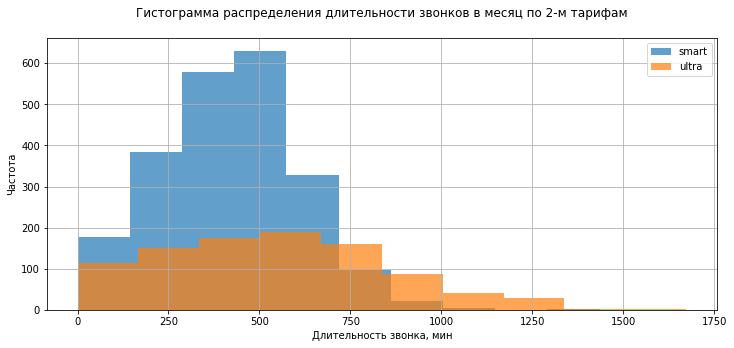

In [27]:
calls_smart = proceeds.query('tariff=="smart"')
calls_ultra = proceeds.query('tariff=="ultra"')
plt.figure(figsize=(12,5))
fig1 = plt.hist(calls_smart['calls_sum'], bins = 10, alpha=0.7, label='smart')
fig2 = plt.hist(calls_ultra['calls_sum'], bins = 10, alpha=0.7, label='ultra')
plt.xlabel('Длительность звонка, мин')
plt.ylabel('Частота')
plt.title('Гистограмма распределения длительности звонков в месяц по 2-м тарифам'+"\n")
plt.grid()
plt.legend()
plt.show()

По гистограмме распределения длительности звонков в месяц по 2-м тарифам видно, что пользователи с тарифом ultra тратят на разговоры больше времени, чем люди с тарифом smart. Также на гистограммах видны небольшое число звонков с нулевой длительностью. Большое число людей с тарифом smart выбивается из лимита в 500 минут.

Распределение среднего значения длительности звонков в месяц по 2-м тарифам

Text(0.5, 0, 'месяц')

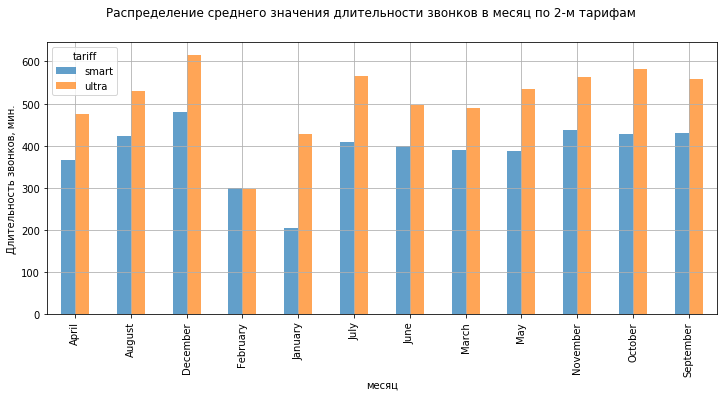

In [28]:
pr = proceeds.pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='mean').T
pr.plot(kind='bar', alpha=0.7, figsize=(12,5), grid=True)
plt.suptitle('Распределение среднего значения длительности звонков в месяц по 2-м тарифам'+ "\n")
plt.ylabel('Длительность звонков, мин.')
plt.xlabel('месяц')

По графику распределения среднего длительности звонков в месяц по 2-м тарифам, видно, что пользователи тарифа ultra тратят гораздо больше времени на разговоры чем пользователь тарифа smart. Также меньше всего пользователи тарифа smart общались в феврале - 210 минут, а пользователи тарифа ultra меньше всего общались в январе - 400 минут. Самая большая длительность звонков фиксируется в декабре и составляет 639 минут для тарифа ultra и 474 для тарифа smart.

Диаграмма размаха среднего значения длительности звонков в месяц по 2-м тарифам

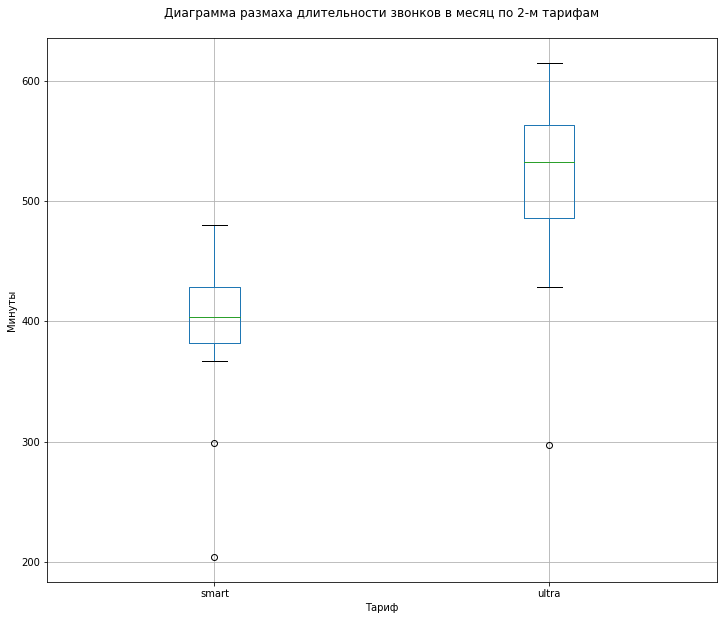

In [29]:
pr.plot(kind='box', figsize = (12,10), grid=True)
plt.title('Диаграмма размаха длительности звонков в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Тариф')
plt.ylabel('Минуты')
plt.show()

In [30]:
pr.describe()

tariff,smart,ultra
count,12.000000,12.000000
mean,387.605810,511.234714
std,72.779777,84.765105
min,203.852941,297.125000
25%,382.304759,486.061958
50%,403.210359,532.430825
75%,428.259435,562.872688
max,479.985119,614.925373


По диаграмме размаха видно, что медианное значение длительности звонков для тарифа smart составляет 403 минуты, а для тарифа ultra - 532 минуты. Медианное значение длительности звонков тарифа ultra хоть и больше медианы тарифа smart, но диаграмма размаха тарифа ultra немного скошена влево, следовательно, большинство пользователей данного тарифа в месяц общаются меньше медианного значения. Также видно, что практически нет выбросов и выбивающихся значений.

Дисперсия длительности звонков

In [31]:
np.var(proceeds.query('tariff == "smart"').calls_sum, ddof=1)

35844.1895513438

In [32]:
np.var(proceeds.query('tariff == "ultra"').calls_sum, ddof=1)

94203.41839614809

Стандартное откланение длительности звонков

In [33]:
np.std(proceeds.query('tariff == "smart"').calls_sum, ddof=1)

189.3256177894154

In [34]:
np.std(proceeds.query('tariff == "ultra"').calls_sum, ddof=1)

306.9257538821858

Гистограмма распределения стандартного отклонения длительности звонков в месяц по 2-м тарифам

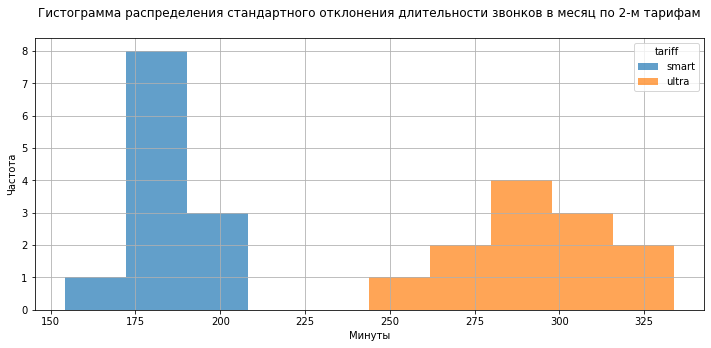

In [35]:
(proceeds
 .pivot_table(index='tariff', columns='month', values='calls_sum', aggfunc='std').T
 .plot(kind='hist', alpha=0.7, bins=10, grid=True, figsize=(12,5))
)
plt.title('Гистограмма распределения стандартного отклонения длительности звонков в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частота')
plt.show()

По графику выше видно, что гистограмме распределения стандартного откланения тарифа ultra скошено влево, следовательно, большенство пользователей данного тарифа тратят на разговоры меньше медианного времени. 

### 3.2. Анализ отправленных сообщений  <a id="analyse_messages"></a> 

Гистограмма распределения отправленных сообщений в месяц по 2-м тарифам

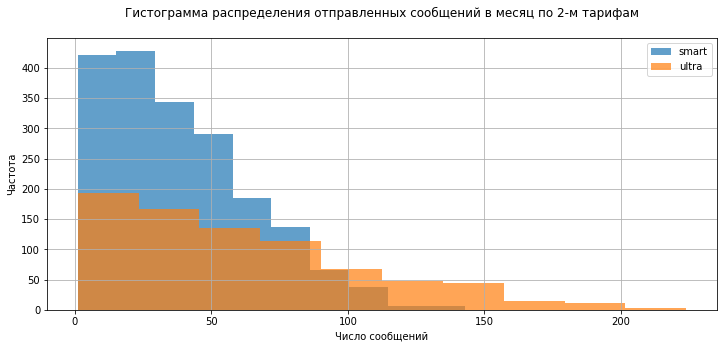

In [36]:
plt.figure(figsize=(12,5))
plt.hist(calls_smart['messages_count'], bins = 10, alpha=0.7, label='smart')
plt.hist(calls_ultra['messages_count'], bins = 10, alpha=0.7, label='ultra')
plt.xlabel('Число сообщений')
plt.ylabel('Частота')
plt.title('Гистограмма распределения отправленных сообщений в месяц по 2-м тарифам'+"\n")
plt.grid()
plt.legend()
plt.show()

По гистограмме распределения отправленных сообщений видно большое количество нулевых значений. Также на гистограмме у пользователей тарифа ultra наблюдается хвост из больших значений. Довольно большое число людей с тарифом smart выбивается из лимита в 50 сообщений.

Распределение среднего значения отправленных сообщений в месяц по 2-м тарифам

Text(0.5, 0, 'месяц')

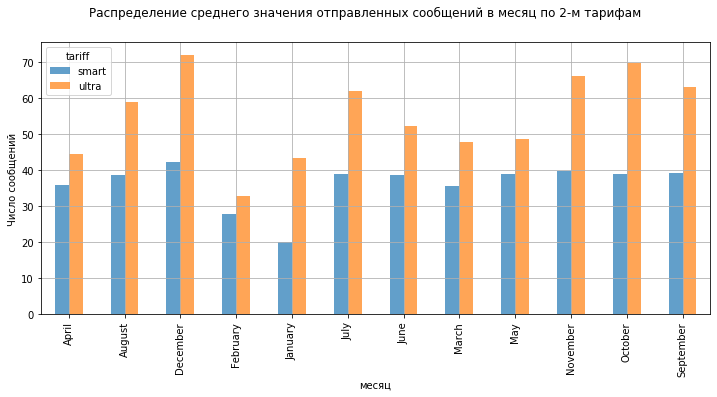

In [37]:
messages_pr = proceeds.pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='mean').T
messages_pr.plot(kind='bar', alpha=0.7, figsize=(12,5), grid=True)
plt.suptitle('Распределение среднего значения отправленных сообщений в месяц по 2-м тарифам'+ "\n")
plt.ylabel('Число сообщений')
plt.xlabel('месяц')

По графику распределения среднего отправленных сообщений в месяц по 2-м тарифам видно, что меньше всего отправлено сообщений в феврале и марте, а больше всего в декабре и октябре.

Диаграмма размаха среднего значения длительности звонков в месяц по 2-м тарифам

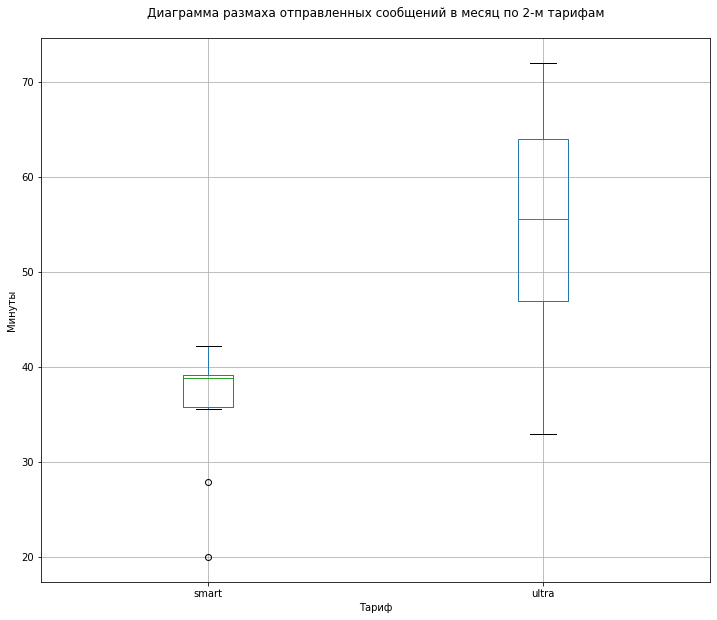

In [38]:
messages_pr.plot(kind='box', figsize = (12,10), grid=True)
plt.title('Диаграмма размаха отправленных сообщений в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Тариф')
plt.ylabel('Минуты')
plt.show()

In [39]:
messages_pr.describe()

tariff,smart,ultra
count,12.000000,12.000000
mean,36.262730,55.169629
std,6.229501,12.042615
min,20.000000,32.937500
25%,35.786119,46.978205
50%,38.869253,55.605580
75%,39.116941,64.010876
max,42.264808,72.008547


По диаграмме размаха видно, что медианное значение отправленных сообщений для тарифа smart составляет 38 сообщений, а для тарифа ultra - 55. Диаграммы размаха тарифов ultra и smart скошены влево, следовательно, большинство пользователей обоих тарифов в месяц отправляют сообщения меньше медианного значения.

Дисперсия отправленных сообщений

In [40]:
np.var(proceeds.query('tariff == "smart"').messages_count, ddof=1)

717.5942011753547

In [41]:
np.var(proceeds.query('tariff == "ultra"').messages_count, ddof=1)

2109.6591828651995

Стандартное откланение отправленных сообщений

In [42]:
np.std(proceeds.query('tariff == "smart"').messages_count, ddof=1)

26.787948804926344

In [43]:
np.std(proceeds.query('tariff == "ultra"').messages_count, ddof=1)

45.93102636416042

Гистограмма распределения стандартного отклонения отправленных сообщений в месяц по 2-м тарифам

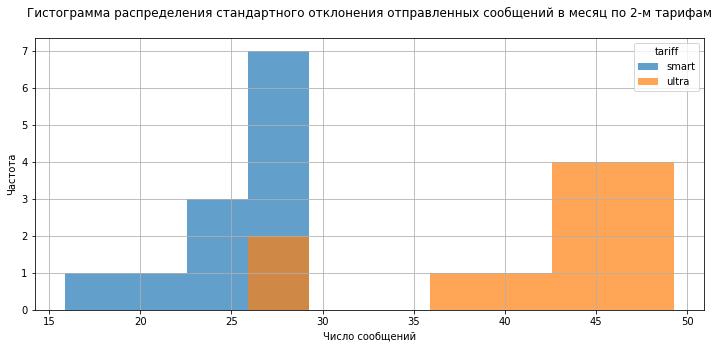

In [44]:
(proceeds
 .pivot_table(index='tariff', columns='month', values='messages_count', aggfunc='std')
 .T
 .plot(kind='hist', alpha=0.7, bins=10, grid=True, figsize=(12,5))
)
plt.title('Гистограмма распределения стандартного отклонения отправленных сообщений в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Число сообщений')
plt.ylabel('Частота')
plt.show()

По гистограммам распределения стандартного отклонения отправленных сообщений видно, что обе гистограммы скошены влево.

### 3.3. Анализ интернет-трафика  <a id="analyse_internet"></a> 

Гистограмма распределения интернет-трафика в месяц по 2-м тарифам

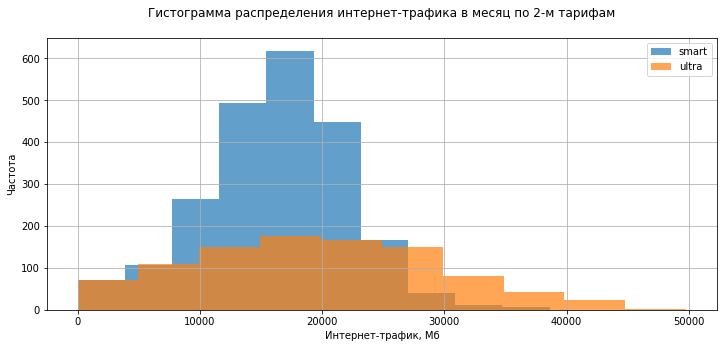

In [45]:
plt.figure(figsize=(12,5))
plt.hist(calls_smart['internet_sum'], bins = 10, alpha=0.7, label='smart')
plt.hist(calls_ultra['internet_sum'], bins = 10, alpha=0.7, label='ultra')
plt.xlabel('Интернет-трафик, Мб')
plt.ylabel('Частота')
plt.title('Гистограмма распределения интернет-трафика в месяц по 2-м тарифам'+"\n")
plt.grid()
plt.legend()
plt.show()

По графику выше видно, что пользователи тарифа ultra используют интернет-трафик больше чем пользователи тарифа smart. Пользователи тарифа smart часто выбиваются из лимита в 15 Гб, а также есть небольшое число людей с тарифом ultra выбивающихся из лимита в 30 Гб. На гистограммах видны небольшое число значений с нулевым интернет-трафиком.

Распределение среднего значения потраченного интернет-трафика в месяц по 2-м тарифам

Text(0.5, 0, 'месяц')

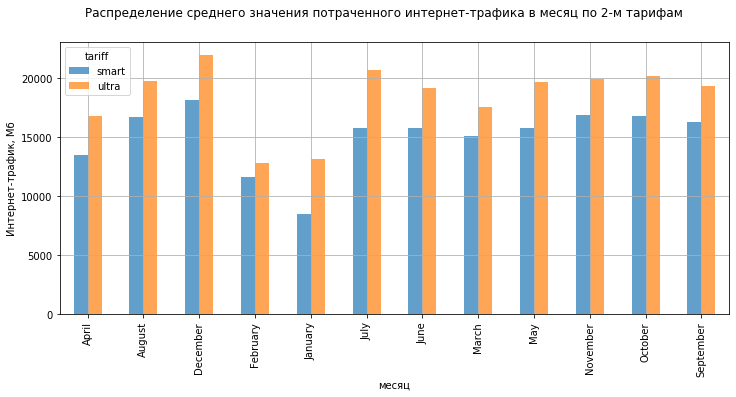

In [46]:
internet_pr = proceeds.pivot_table(index='tariff', columns='month', values='internet_sum', aggfunc='mean').T
internet_pr.plot(kind='bar', alpha=0.7, figsize=(12,5), grid=True)
plt.suptitle('Распределение среднего значения потраченного интернет-трафика в месяц по 2-м тарифам'+ "\n")
plt.ylabel('Интернет-трафик, Мб')
plt.xlabel('месяц')

По графику распределения среднего потраченного интернет-трафика в месяц по 2-м тарифам, видно, что пользователи обоих тарифов примерно одинаково используют интернет-трафик.

Диаграмма размаха среднего значения потраченного интернет-трафика в месяц по 2-м тарифам

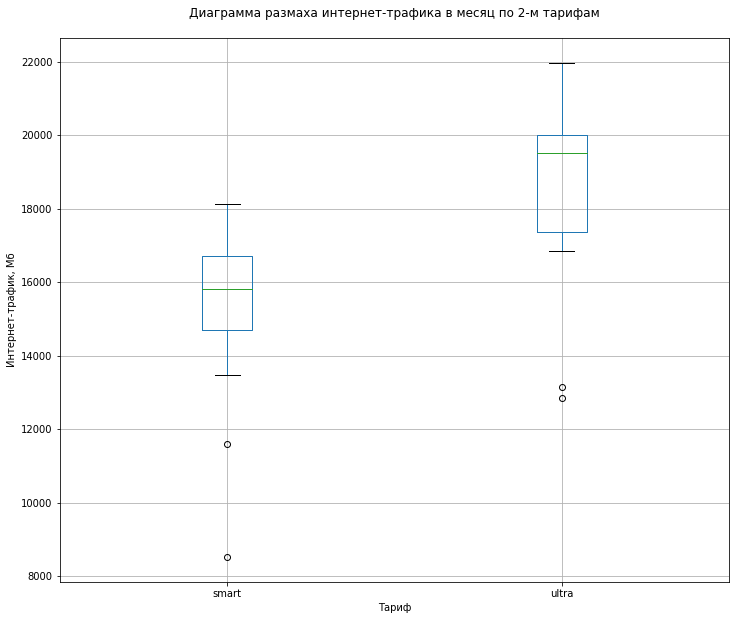

In [47]:
internet_pr.plot(kind='box', figsize = (12,10), grid=True)
plt.title('Диаграмма размаха интернет-трафика в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Тариф')
plt.ylabel('Интернет-трафик, Мб')
plt.show()

In [48]:
internet_pr.describe()

tariff,smart,ultra
count,12.000000,12.000000
mean,15083.613790,18443.306354
std,2678.569026,2867.635425
min,8524.441176,12858.500000
25%,14712.763393,17374.929730
50%,15819.983437,19532.836523
75%,16722.080259,20022.751140
max,18136.833828,21971.659420


По диаграмме размаха видно, что медианное значение потраченного интернет-трафика для тарифа smart составляет 15.8 Гб, а для тарифа ultra - 19.5 Гб. Диаграмма размаха тарифа ultra скошена вправо, следовательно, большинство пользователей данного тарифа в месяц используют интернет-трафик больше медианного значения.

Дисперсия интернет-трафика

In [49]:
np.var(proceeds.query('tariff == "smart"').internet_sum, ddof=1)

34443100.68133359

In [50]:
np.var(proceeds.query('tariff == "ultra"').internet_sum, ddof=1)

99043439.6079566

Стандартное откланение интернет-трафика

In [51]:
np.std(proceeds.query('tariff == "smart"').internet_sum, ddof=1)

5868.824471845583

In [52]:
np.std(proceeds.query('tariff == "ultra"').internet_sum, ddof=1)

9952.057054094726

Гистограмма распределения стандартного отклонения интернет-трафика в месяц по 2-м тарифам

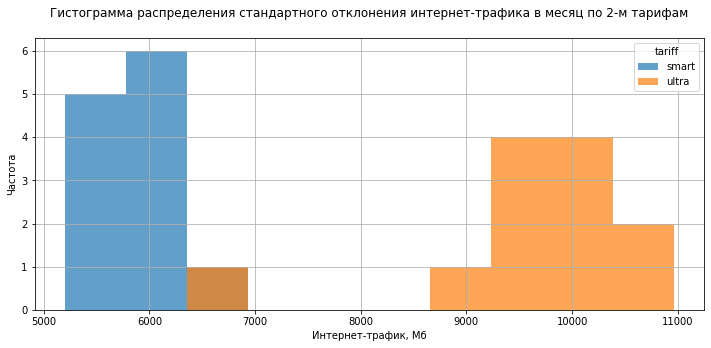

In [53]:
(proceeds
 .pivot_table(index='tariff', columns='month', values='internet_sum', aggfunc='std')
 .T
 .plot(kind='hist', alpha=0.7, bins=10, grid=True, figsize=(12,5))
)
plt.title('Гистограмма распределения стандартного отклонения интернет-трафика в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Интернет-трафик, Мб')
plt.ylabel('Частота')
plt.show()

По гистограммам распределениям стандартного отклонения интернет-трафика заметно, что гистограмма тарифа smart скошена влево, а гистограмма интернет-трафика тарифа ultra скошена вправо.

### Вывод:

В данном пункте были построены гистограммы распределения, распределения, диаграммы размаха и гистограммы стандартного отклонения для всех параметров по месяцам двух тариф, также посчитаны дисперсии. Исходя из проанализированных данных выяснилось следующее:
* В среднем пользователи тарифа smart и ultra тратят на разговоры 400 и 532 минуты соответственно, также пользователи тарифа smart чаще выбиваются из лимита в 500 минут;
* Среднее число отправленных сообщений пользователей тарифа smart и ultra 38 и 55 соответственно;
* Среднее число потраченного интернет-трафика для тарифа smart составляет 15.8 Гб, а для тарифа ultra - 19.5 Гб, также пользователи тарифа smart часто исчерпывают месячный лимит в 15 Гб.


## 4. Проверка гипотез <a id="hypotheses"></a>

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Сформулируем нулевую гипотезу H₀: средняя выручка пользователей тарифов ultra и smart равна. Тогда альтернативная гипотеза H₁ будет звучать так: средняя выручка пользователей тарифов ultra и smart различается.

In [54]:
proceeds_smart_mean = calls_smart['total_proceeds'].mean()
proceeds_ultra_mean = calls_ultra['total_proceeds'].mean()
print('Cредняя выручка тарифа smart:',proceeds_smart_mean)
print('Cредняя выручка тарифа ultra:',proceeds_ultra_mean)

Cредняя выручка тарифа smart: 1233.0430318105382
Cредняя выручка тарифа ultra: 2060.417871688007


In [55]:
alpha = 0.05
results1 = st.ttest_ind(calls_smart['total_proceeds'], calls_ultra['total_proceeds'])
print('pvalue =',results1.pvalue)
if results1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

pvalue = 6.129437607155033e-191
Отвергаем нулевую гипотезу


Методом t-теста для сравнения двух генеральных совокупностей определено, что средняя выручка пользователей тарифов ultra и smart различается.

Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Гипотеза H₀: средняя выручка пользователей из Москвы равна выручке от пользователей из других регионов;

Гипотеза H₁: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [56]:
city = df_users.loc[:,['user_id','city']]
proceeds = city.merge(proceeds, on=['user_id'])
proceeds_moscow = proceeds.query('city=="Москва"')
proceeds_other = proceeds.query('city not in "Москва"')
proceeds_moscow_mean = proceeds_moscow['total_proceeds'].mean()
proceeds_other_mean = proceeds_other['total_proceeds'].mean()
print('Cредняя выручка пользователей из Москвы:',proceeds_moscow_mean)
print('Cредняя выручка пользователей из других регионов:',proceeds_other_mean)

Cредняя выручка пользователей из Москвы: 1507.276761968085
Cредняя выручка пользователей из других регионов: 1481.8855588711613


In [57]:
alpha = 0.05
results2 = st.ttest_ind(proceeds_other['total_proceeds'],proceeds_moscow['total_proceeds'])
print('pvalue =', results2.pvalue)
if results2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

pvalue = 0.4712668200760739
Не получилось отвергнуть нулевую гипотезу


Методом t-теста для сравнения двух генеральных совокупностей определено, что средняя выручки пользователей из Москвы имеет вероятность различия примерно равной 50% от выручки из других регионов. Такая большая вероятность говрит о том, что различия между выборками незначительны.

## 5. Общие выводы <a id="conclusions"></a>

В ходе выполнения проекта проведено исследование тарифов телеком-компании.

Перед проведением исследования данных было произведено первичное изучение файлов, в ходе которого выявлены нулевые значения и различия типов данных.

При подготовке данных были оптимизированы и переведены типы данных. Нулевые значения оставлены без изменений. Также для каждого пользователя посчитаны:
* Количество сделанных звонков и израсходованных минут разговора по месяцам;
* Количество отправленных сообщений по месяцам;
* Объем израсходованного интернет-трафика по месяцам;
* Помесячную выручку с каждого пользователя.

При проведении анализа данных были построены гистограммы распределения, распределения, диаграммы размаха и гистограммы стандартного отклонения для всех параметров по месяцам двух тариф, также посчитаны дисперсии. В ходе исследования вышеперечисленных графиков сделаны следующие заключениям:
* Пользователи с тарифом ultra тратят на разговоры больше времени, чем люди с тарифом smart. Медианное значение длительности звонков для тарифа smart составляет 403 минуты, а для тарифа ultra - 532 минуты;
* Большинство пользователей тарифа ultra тратят на разговоры меньше медианного времени;
* Пользователи с тарифом ultra отправляют сообщения больше, чем пользователи с тарифом smart. Медианное значение отправленных сообщений для тарифа smart составляет 38 сообщений, а для тарифа ultra - 55;
* Большинство пользователей тарифа ultra и smart отправляют сообщений меньше медианного времени;
* Для двух тарифов наблюдаются большое количество нулевых отправленных сообщений;
* Пользователи обоих тарифов в месяц примерно одинаково используют интернет-трафик. Медианное значение потраченного интернет-трафика для тарифа smart составляет 15.8 Гб, а для тарифа ultra - 19.5 Гб;
* Большинство пользователей тарифа ultra в месяц используют интернет-трафик больше медианного значения, а большинство пользователей тарифа smart, наоборот, используют интернет-трафик меньше медианного значения;
* Довольно большое число людей с тарифом smart выбивается из лимита по минутам, сообщениям и интернет-трафика.

Проверка гипотез сравнением двух генеральных совокупностей показала, что в первом случае средняя выручка пользователей тарифов ultra и smart различается, при чем различие довольно сильное. Во втором случае средняя выручка пользователей из Москвы примерно равна выручке полученной от пользователей из других регионов.